In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [10]:
mnist = tf.keras.datasets.mnist

In [11]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [12]:
X_train.shape, Y_train.shape,X_test.shape,Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [16]:
Y_train[0]

5

In [13]:
X_train = X_train/255.0
X_test = X_test/255.0

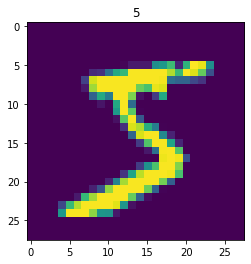

In [21]:
plt.imshow(X_train[0])
plt.title(Y_train[0])
plt.show()

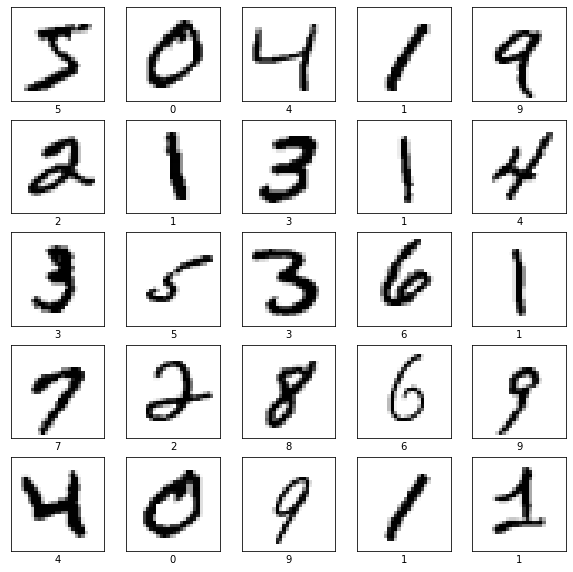

In [24]:
plt.figure(figsize = (10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i],cmap = plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(Y_train[i])

In [28]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape = (28,28)),
        tf.keras.layers.Dense(256,activation = 'relu'),
        tf.keras.layers.Dense(10)
])

In [29]:
model.compile(optimizer = 'adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),metrics = ['accuracy'])

In [30]:
model.fit(X_train,Y_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2271 - accuracy: 0.9348
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0924 - accuracy: 0.9729
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0608 - accuracy: 0.9811
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0424 - accuracy: 0.9868
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0314 - accuracy: 0.9904
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0248 - accuracy: 0.9923
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0198 - accuracy: 0.9939
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0144 - accuracy: 0.9955
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0139 - accuracy: 0.9955
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.010

In [31]:
#accuracy
test_loss,test_accuracy = model.evaluate(X_test,Y_test,verbose = 2)

print(test_accuracy)

313/313 - 0s - loss: 0.0923 - accuracy: 0.9769
0.9768999814987183


In [32]:
#making predictions
prediction_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [33]:
predictions = prediction_model.predict(X_test)

In [34]:
predictions[0]

array([1.8031219e-11, 2.5814309e-10, 2.6454502e-11, 1.5843281e-07,
       3.2719717e-14, 2.1032466e-12, 3.4485604e-15, 9.9999988e-01,
       3.3834757e-13, 1.1714650e-10], dtype=float32)

In [35]:
np.argmax(predictions[0])

7

In [36]:
print(Y_test[0])

7


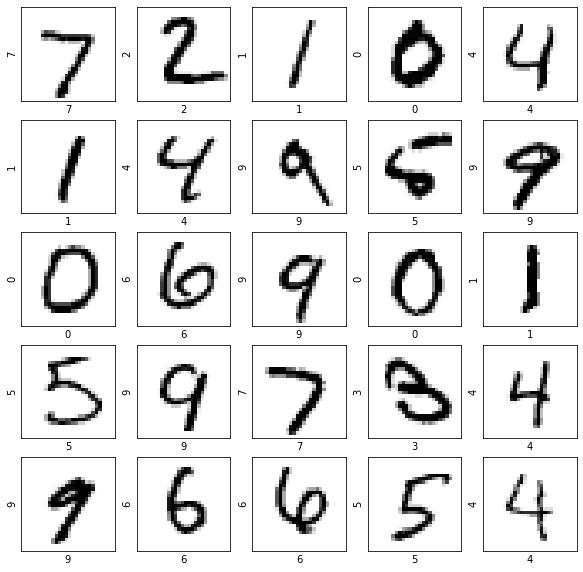

In [38]:
plt.figure(figsize = (10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[i],cmap = plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(np.argmax(predictions[i]))
    plt.xlabel(Y_test[i])